# Task1

In [5]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np
import matplotlib.pyplot as plt

Tk().withdraw()
filename = askopenfilename()
# filename = "/Users/modestasgrazys/Documents/VU/Signal Processing/Samples/0c91a6b2.wav"

with open(filename, 'rb') as input_file:
    riff = input_file.read(4)
    file_size = int.from_bytes(input_file.read(4), "little")
    file_type_header_wave = input_file.read(4)
    format_chunk_marker = input_file.read(4)
    length_of_format_data = int.from_bytes(input_file.read(4), "little")
    type_of_format = int.from_bytes(input_file.read(2), "little")
    number_of_channels = int.from_bytes(input_file.read(2), "little")
    sample_rate = int.from_bytes(input_file.read(4), "little")
    byte_rate = int.from_bytes(input_file.read(4), "little")
    bytes_per_sample_channels = int.from_bytes(input_file.read(2), "little")
    bits_per_sample = int.from_bytes(input_file.read(2), "little")
    data_header = input_file.read(4)
    data_size = int.from_bytes(input_file.read(4), "little")
    
    print(f'File size: {file_size} bytes')
    print(f'Length of format data: {length_of_format_data}')
    print(f'Type of format: {type_of_format}, (1 - is PCM)')
    print(f'Number of channels: {number_of_channels}')
    if number_of_channels == 1:
        print(f'Mono audio')
    elif number_of_channels == 2:
        print(f'Stereo audio')
    else:
        raise Exception("This number of channels is unsopported")
    print(f'BytesPerSample x Channels: {bytes_per_sample_channels}')
    print(f'Byte Rate: {byte_rate}')
    print(f'Sample rate: {sample_rate}')
    print(f'Bits per sample: {bits_per_sample}')
    if data_size > file_size:
        data_size = file_size - 8
    print(f'Data size: {data_size} bytes')
    
    sample_in_bytes = input_file.read(data_size)

File size: 464450 bytes
Length of format data: 18
Type of format: 1, (1 - is PCM)
Number of channels: 2
Stereo audio
BytesPerSample x Channels: 4
Byte Rate: 176400
Sample rate: 44100
Bits per sample: 16
Data size: 464442 bytes


In [6]:
bytes_per_sample = int(bits_per_sample / 8)
total_samples = int(data_size / (bytes_per_sample * number_of_channels))
sound_duration = total_samples / sample_rate


samples = []

if number_of_channels == 1:
    for i in range(total_samples):
        sample = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        samples.append(sample)
elif number_of_channels == 2:
    for i in range(total_samples):
        sample1 = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        sample2 = int.from_bytes(sample_in_bytes[bytes_per_sample*(i+2):bytes_per_sample*(i+3)], "little", signed=True)
        samples.append((sample1, sample2))
else:
    raise Exception("More than 2 channel audio files unsupported")


print(f'Bytes per sample: {bytes_per_sample}')
print(f'Total samples in the audio file: {total_samples}')
print(f'Sound duration: {sound_duration} s')

Bytes per sample: 2
Total samples in the audio file: 116110
Sound duration: 2.6328798185941045 s


In [7]:
# Set marker position in the sound diagram. Please mind the duration of a sound
marker_position = 0.7

marker_position = marker_position * sample_rate

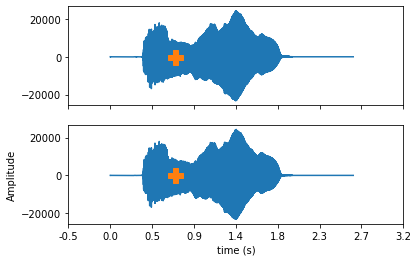

In [8]:
if number_of_channels == 1:
    samples = np.array(samples)
    time_axis = np.arange(0, total_samples)
    plt.plot(time_axis, samples)
    plt.plot(marker_position, 0, marker="P", markersize=15)
elif number_of_channels == 2:
    channel1_samples = [channel1_sample for (channel1_sample, channel2_sample) in samples]
    channel2_samples = [channel2_sample for (channel1_sample, channel2_sample) in samples]
    time_axis = np.arange(0, total_samples)
    fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
    ax[0].plot(time_axis, channel1_samples)
    ax[0].plot(marker_position, 0, marker="P", markersize=15)
    ax[1].plot(time_axis, channel2_samples)
    ax[1].plot(marker_position, 0, marker="P", markersize=15)
    
tick_locations, tick_labels = plt.xticks()
tick_labels = [round(value / sample_rate, 1) for value in tick_locations]
plt.xticks(ticks=tick_locations, labels=tick_labels)
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()